In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv('/Users/poyraz/Google Drive/Data Science/Projects/Github Projects/credit_card_fraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [7]:
df.Time.value_counts(normalize=True)

163152.0    0.000126
64947.0     0.000091
68780.0     0.000088
3767.0      0.000074
3770.0      0.000070
              ...   
2088.0      0.000004
64100.0     0.000004
42068.0     0.000004
119630.0    0.000004
140344.0    0.000004
Name: Time, Length: 124592, dtype: float64

In [8]:

#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()



,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


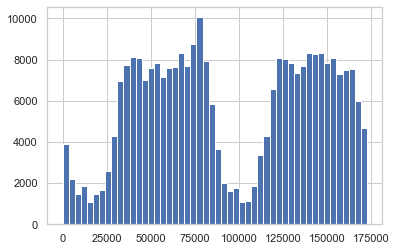

In [9]:
df.Time.hist(bins=50)
plt.show()

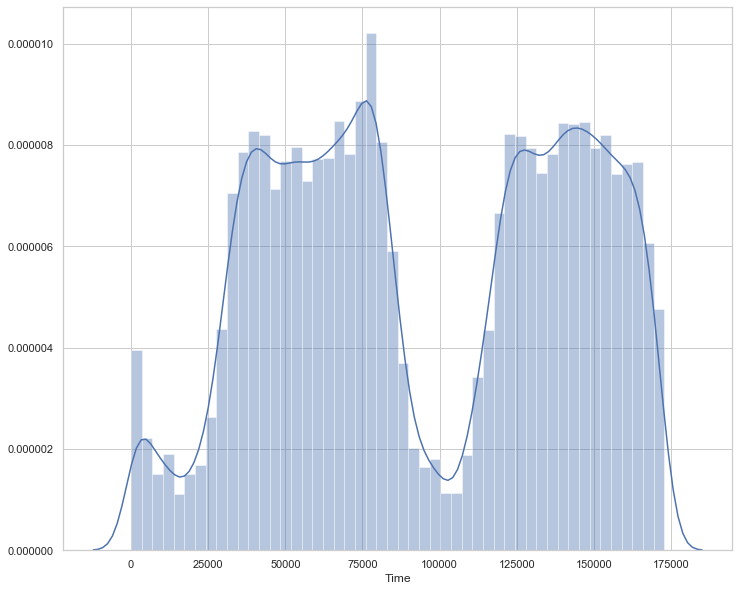

In [10]:
plt.figure(figsize=(12,10))

sns.distplot(df['Time'])
plt.show()

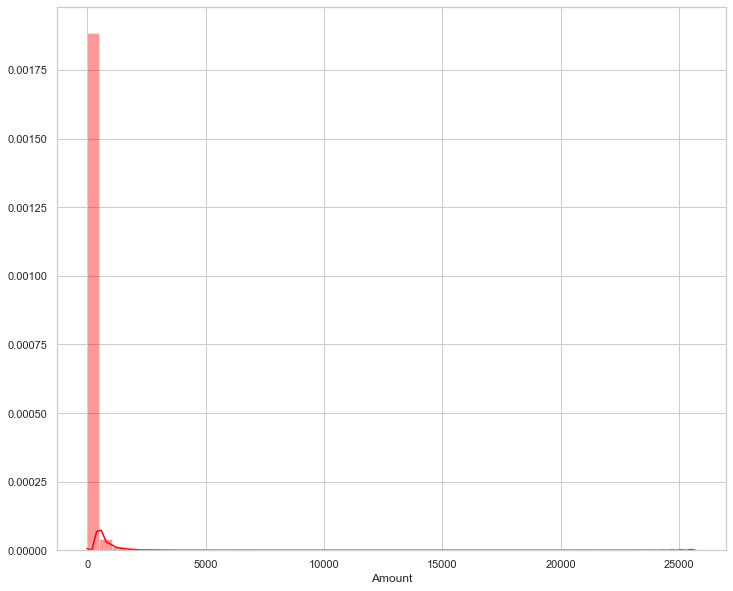

In [11]:
plt.figure(figsize=(12,10))

sns.distplot(df['Amount'], color='red')
plt.show()

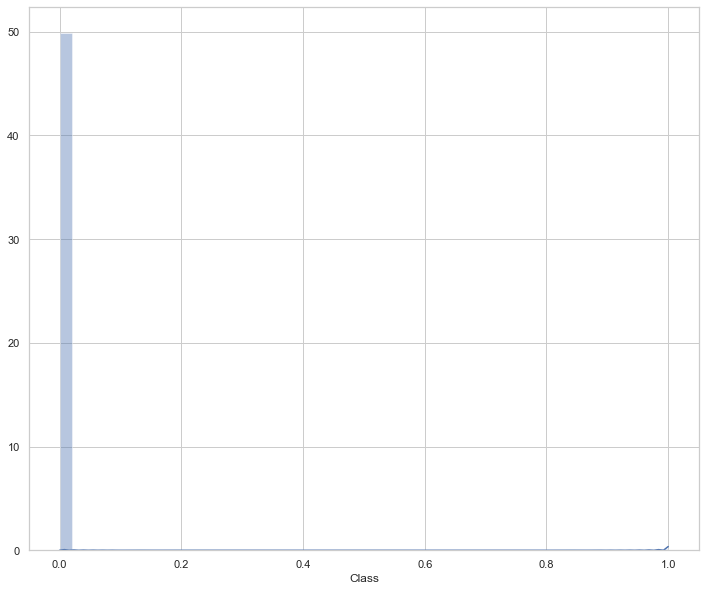

In [12]:
plt.figure(figsize=(12,10))

sns.distplot(df['Class'])
plt.show()

In [13]:
fraud=df['Class'].value_counts()[1]
nonfraud=df['Class'].value_counts()[0]

print(f'Fraudelent:{fraud}, Non-fraudulent:{nonfraud}')

print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudelent:492, Non-fraudulent:284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

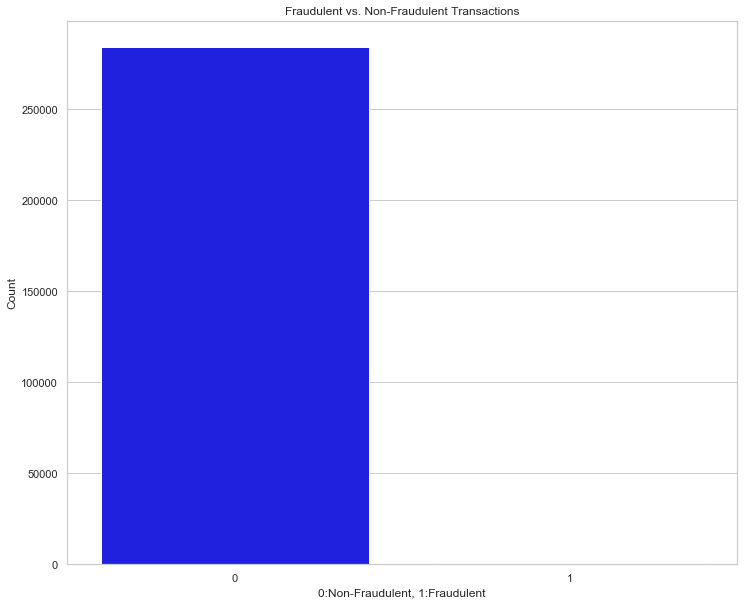

In [14]:
plt.figure(figsize=(12,10))

sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

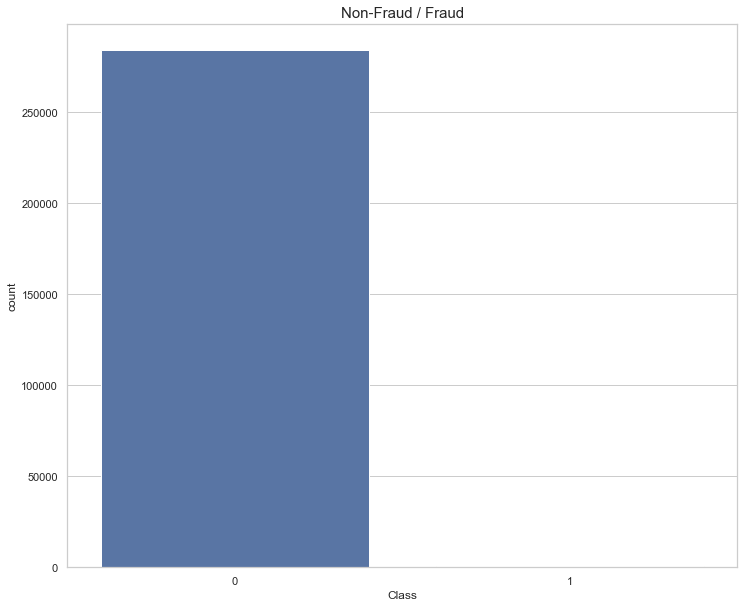

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(df.Class)

plt.title('Non-Fraud / Fraud', fontsize=15)
plt.show()

f,ax =plt.subplots(figsize=(55,55))

sns.set(font_scale=1)

sns.heatmap(df.corr(method='kendall'), annot=True, linewidths=1,  cmap='ocean_r')
plt.suptitle('Correlation Map')

plt.show()

df.corr(method='pearson')

df.corr(method='kendall')

f,ax =plt.subplots(figsize=(55,55))

sns.set(font_scale=1)

sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=1,  cmap='ocean_r')
plt.suptitle('Correlation Map')

plt.show()

In [16]:
#check multicollinearity

#check Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
A = df.drop('Class',axis=1)
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))




    variables    VIF
0        Time   1.88
1          V1   1.65
2          V2   4.42
3          V3   1.88
4          V4   1.14
5          V5   2.86
6          V6   1.57
7          V7   2.93
8          V8   1.13
9          V9   1.02
10        V10   1.13
11        V11   1.12
12        V12   1.03
13        V13   1.01
14        V14   1.03
15        V15   1.06
16        V16   1.00
17        V17   1.01
18        V18   1.03
19        V19   1.04
20        V20   2.40
21        V21   1.14
22        V22   1.09
23        V23   1.16
24        V24   1.00
25        V25   1.13
26        V26   1.00
27        V27   1.01
28        V28   1.00
29     Amount  12.12
30  Intercept  10.07


there is a multicollinearity possiblity between "Amount" and other variables such as V2, V3, V5, V7 and V20 according to Pearson correlation. 

Also, according to Kendall correlation V21 and V22 may have a sign of multicollinearity.

Amount and V22 column is removed. 


In [17]:
df_new=df.drop(['Amount','V2','V5','V9','V13','V15','V22','V23','V24','V25','V26','V28', 'V22'], axis=1)

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
Time     284807 non-null float64
V1       284807 non-null float64
V3       284807 non-null float64
V4       284807 non-null float64
V6       284807 non-null float64
V7       284807 non-null float64
V8       284807 non-null float64
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V14      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V19      284807 non-null float64
V20      284807 non-null float64
V21      284807 non-null float64
V27      284807 non-null float64
Class    284807 non-null int64
dtypes: float64(18), int64(1)
memory usage: 41.3 MB


In [19]:
X=df_new.drop('Class',axis=1)
y=df_new['Class']

# Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)



In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)



/Users/poyraz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.58      0.47      0.52       246

    accuracy                           1.00    142404
   macro avg       0.79      0.74      0.76    142404
weighted avg       1.00      1.00      1.00    142404



# K Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[142158      0]
 [   224     22]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       1.00      0.09      0.16       246

    accuracy                           1.00    142404
   macro avg       1.00      0.54      0.58    142404
weighted avg       1.00      1.00      1.00    142404



# Support Vector Machine

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()

model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions)

print(classification_report(y_test,predictions))

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train,y_train)

# According to Towards DataScience website

data=df_new.drop(columns=['Class'])
answer=df_new['Class']

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df_new['Class'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)